# Task A

### Google Vision API function

In [95]:
from google.cloud import vision

def detect_labels(image_path):
    client = vision.ImageAnnotatorClient()

    with open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations

    labels_all = ""

    
    for label in labels:
        # print(label.description)
        labels_all += label.description + ","

    return labels_all
    
  
# Specify the path to your local image
image_path = 'Data/aashnashroff_969148_3000403601659402518_25980_65/2022-12-24_15-33-23_UTC_1.jpg'

# Call the label detection function

print(detect_labels(image_path))


Sky,Cloud,Leg,Flash photography,Happy,Travel,Thigh,Waist,Leisure,Fun,


#### Creating a dataframe of the dataset downloaded with columns: post_id, image1_name, comments_count, caption 


In [78]:
# Creating a dataframe with columns: post_id = name of the folders inside folder Data, image1_name = name of first image in the folder, comments_count = from json file data["node"]["edge_media_to_comment"]["count"], caption = from .txt file in the folder

import os
import json
import pandas as pd

# Path to the 'Data' directory
data_dir = 'Data'  # Change this to the path of your 'Data' directory

# Prepare a list to store each row's data
data = []

# Traverse through each post's folder inside the 'Data' directory
for post_id in os.listdir(data_dir):
    post_dir = os.path.join(data_dir, post_id)
    
    # Check if it's a directory
    if os.path.isdir(post_dir):
        # List all files and sort them to ensure consistency
        files = sorted(os.listdir(post_dir))
        
        # Initialize variables
        image1_name = None
        comments_count = None
        
        # Look for the first image and JSON file
        for file in files:
            if file.endswith('.json'):
                # Read the JSON file
                with open(os.path.join(post_dir, file), 'r') as f:
                    json_data = json.load(f)
                    # Extract comments_count
                    comments_count = json_data["node"]["edge_media_to_comment"]["count"]
            elif image1_name is None and (file.endswith('.jpg') or file.endswith('.png')):
                # Assume the first image encountered is image1
                image1_name = file

            elif file.endswith('.txt'):
                # Read the caption from the text file
                with open(os.path.join(post_dir, file), 'r') as f:
                    caption = f.read()
        
        # Append the data for the current post to the list
        data.append({'post_id': post_id, 'image1_name': image1_name, 'comments_count': comments_count, 'caption': caption})

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,post_id,image1_name,comments_count,caption
0,kayaancontractor_100226_2868439159916464863_205_2,2022-06-25_13-43-36_UTC_1.jpg,2,“Got your nose!”🫶🏻 #caturday \n.\n#saturday #l...
1,debasreee_307029_3066886135067171352_7650_20,2023-03-26_09-02-19_UTC_1.jpg,20,Dreaming of this as I have the laziest Sunday ...
2,shereenlovebug_333413_3029832820659598377_456_27,2023-02-03_06-03-59_UTC_1.jpg,27,@diorbeauty forever 🖤\n.\n.\n.\n\n⁣\n.⁣\n.⁣\n....
3,mandirabedi_2034192_2889470489057495466_9167_86,2022-07-24_14-09-05_UTC_1.jpg,86,And that’s how you eat a s’more !! \n#marshmel...
4,rahulkl_130314_3053766391959056433_4057_18,2023-03-08_06-35-43_UTC.jpg,18,Happy Holi everyone 😆❤️💚💜\n\nHas v liya karro ...


In [79]:
df[df['post_id'] == 'aashnashroff_969148_3000403601659402518_25980_65']


,post_id,image1_name,comments_count,caption
1856,aashnashroff_969148_3000403601659402518_25980_65,2022-12-24_15-33-23_UTC_1.jpg,65,Bonjour Paree 🥐 ready for a Parisian Christmas...


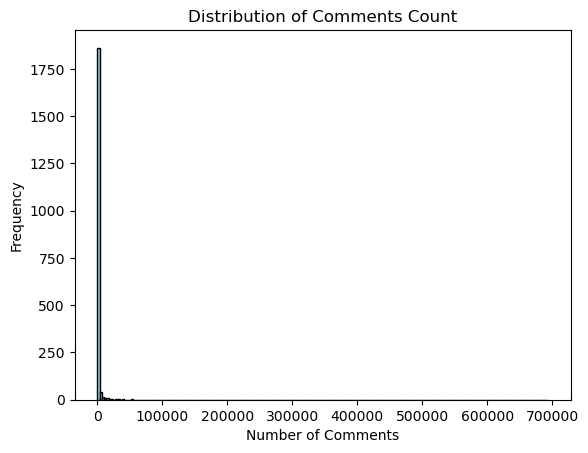

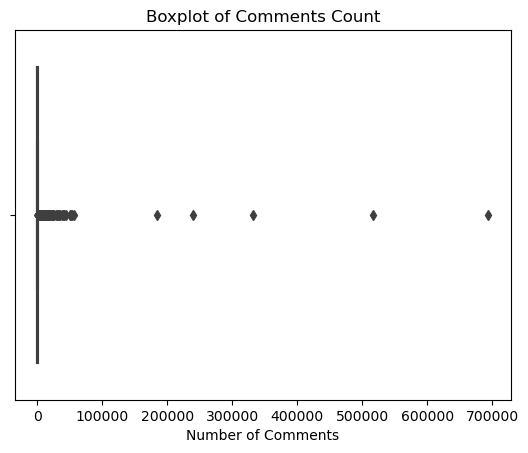

In [80]:
# plot comments_count distribution
import matplotlib.pyplot as plt

plt.hist(df['comments_count'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments Count')
plt.show()

#box plot
import seaborn as sns

sns.boxplot(x=df['comments_count'])
plt.xlabel('Number of Comments')
plt.title('Boxplot of Comments Count')
plt.show()

In [81]:
#quartiles of comments_count
quartiles = df['comments_count'].quantile([0.25, 0.5, 0.75])
print(quartiles)

0.25     30.0
0.50     95.5
0.75    416.0
Name: comments_count, dtype: float64


In [82]:
#sorting the dataframe based on comments_count
df_sorted = df.sort_values('comments_count', ascending=False)
df_sorted

,post_id,image1_name,comments_count,caption
1045,halfbakedharvest_5247243_2996407846187385570_2...,2022-12-19_03-14-32_UTC.jpg,693966,GIVEAWAY🎄Week 2 of Christmas giveaways!! This ...
511,halfbakedharvest_5247243_2990612658156456674_2...,2022-12-11_03-20-32_UTC.jpg,515973,GIVEAWAY ☃️ week 2 of Christmas giveaways. The...
1834,halfbakedharvest_5247243_2986269265263400579_1...,2022-12-05_03-30-59_UTC.jpg,331474,GIVEAWAY 🎄Kicking off our holiday giveaways an...
10,halfbakedharvest_5247243_3000750743145862289_1...,2022-12-25_03-03-05_UTC.jpg,239765,GIVEAWAY 🎅 one last Christmas Eve giveaway! Ce...
578,halfbakedharvest_5247243_2869549391481578933_9...,2022-06-27_02-29-26_UTC.jpg,184733,GIVEAWAY 🦋 I said this was coming (: the suppo...
...,...,...,...,...
330,eventplannerlife_181_456753512781395346_17_0,2013-05-16_01-54-43_UTC.jpg,0,#california #yacht #events #travel 🍸🌴☀✈💕🍹\n
437,eventplanneracademy_33_2283360642806948755_99_0,2020-04-09_07-37-01_UTC.jpg,0,Besuche jetzt unsere Academy! Erhalte CHF 200...
941,kunalgir_13965_2261132305343390536_888_0,2020-03-09_15-33-17_UTC.jpg,0,"It is said that in the beginning of time, when..."
1210,kunalgir_13965_2138354707539057422_556_0,2019-09-22_05-56-07_UTC.jpg,0,When there is no gym around. \nCourtesy: @decc...


#### Picking random 500 rows from the dataset to reduce the googel API cost

Can be scaled to the entire dataset

In [83]:
#pick random 500 rows to the google vision api calls
df_500 = df_sorted.sample(500, random_state=42)
df_500.describe()

,comments_count
count,500.000000
mean,1362.990000
std,14948.927221
min,0.000000
25%,30.750000
50%,102.500000
75%,446.750000
max,331474.000000


#### Using the Google Vision API to extract the labels from the images and saving the output

Code Commented out to avoid accidental execution

In [86]:
# #running google vision API on df_500

# # Add a new column 'labels' to the DataFrame
# label_list = []
# for i in range(len(df_500)):
#     image_path = "Data/" + df_500['post_id'].iloc[i] + "/" + df_500['image1_name'].iloc[i]
#     labels = detect_labels(image_path)
#     label_list.append(labels)
#     if i % 25 == 0:
#         print(i)

# df_500['labels'] = label_list
# df_500

#save csv
# df_500.to_csv('df_500.csv', index=False)



# Using LDA for Topic Modeling

In [88]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming your DataFrame is named 'df' and the labels column is named 'labels'
df = pd.read_csv('df_500.csv')
labels = df['labels']

# Create a CountVectorizer object to convert text to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(labels)

# Create an LDA object and specify the number of topics
lda = LatentDirichletAllocation(n_components=7, random_state=42)

# Fit the LDA model to the data
lda.fit(X)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10:-1]]))
    print()

# Transform the data to get the topic distribution for each label
topic_distributions = lda.transform(X)

# Add the topic distributions as new columns to the DataFrame
for topic_idx in range(lda.n_components):
    df[f'topic_{topic_idx}'] = topic_distributions[:, topic_idx]

# Print the updated DataFrame
df.head()

Topic #0:
photography flash eyewear sleeve smile vision care gesture happy

Topic #1:
sports jersey uniform player shirt equipment gesture baseball shorts

Topic #2:
font hair blue electric happy event circle rectangle head

Topic #3:
automotive vehicle tire lighting car design wheel hood motor

Topic #4:
food ingredient recipe cuisine tableware dish produce staple vegetable

Topic #5:
plant sky people nature cloud happy water tree leisure

Topic #6:
fashion design waist sleeve dress thigh smile formal wear



,post_id,image1_name,comments_count,caption,labels,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
0,anshukayoga_403394_2980015710008403800_3087_133,2022-11-26_12-26-17_UTC.jpg,133,A honour and privilege I will always be gratef...,"Product,Flooring,Smile,Fashion design,Beauty,E...",0.010234,0.010219,0.219281,0.010222,0.010204,0.010213,0.729626
1,santoshishetty_746384_3016966416826776493_7112_30,2023-01-16_12-00-44_UTC_1.jpg,30,Was looking for some photos with @pryanca_t to...,"Glasses,Plant,Shoulder,Shorts,Vision care,Sung...",0.581531,0.011990,0.011921,0.011909,0.011907,0.176490,0.194252
2,sachintendulkar_39433992_3033645984018219249_2...,2023-02-08_12-20-04_UTC_1.jpg,8790,Can you guess the city?\n\n#travel #travelgram\n,"Building,Sky,Water,Smile,Photograph,Skyscraper...",0.406263,0.012997,0.013001,0.012990,0.012992,0.528735,0.013023
3,hbomax_3056324_3057101339109716519_20102_73,2023-03-12_21-01-40_UTC.jpg,73,By your side. \n\nThe season finale of #TheLas...,"Comfort,Flash photography,Fun,Darkness,Art,Sit...",0.194175,0.011912,0.011956,0.011920,0.011923,0.746132,0.011982
4,ajinkyarahane_4701882_2982886863247728429_9568...,2022-11-30_11-30-45_UTC.jpg,133,Our experience with Reelabs has been extremely...,"Joint,Smile,Arm,Shoulder,Beard,Neck,Sleeve,Hap...",0.615869,0.011919,0.011943,0.011905,0.011905,0.011923,0.324536


### Assigning Topic to each image based on the maximum probability of the topic

In [89]:
#assign the topic to each image and drop the topic_0 to topic_6 columns
df['topic'] = df.iloc[:, 5:].idxmax(axis=1)
df.head()

,post_id,image1_name,comments_count,caption,labels,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic
0,anshukayoga_403394_2980015710008403800_3087_133,2022-11-26_12-26-17_UTC.jpg,133,A honour and privilege I will always be gratef...,"Product,Flooring,Smile,Fashion design,Beauty,E...",0.010234,0.010219,0.219281,0.010222,0.010204,0.010213,0.729626,topic_6
1,santoshishetty_746384_3016966416826776493_7112_30,2023-01-16_12-00-44_UTC_1.jpg,30,Was looking for some photos with @pryanca_t to...,"Glasses,Plant,Shoulder,Shorts,Vision care,Sung...",0.581531,0.011990,0.011921,0.011909,0.011907,0.176490,0.194252,topic_0
2,sachintendulkar_39433992_3033645984018219249_2...,2023-02-08_12-20-04_UTC_1.jpg,8790,Can you guess the city?\n\n#travel #travelgram\n,"Building,Sky,Water,Smile,Photograph,Skyscraper...",0.406263,0.012997,0.013001,0.012990,0.012992,0.528735,0.013023,topic_5
3,hbomax_3056324_3057101339109716519_20102_73,2023-03-12_21-01-40_UTC.jpg,73,By your side. \n\nThe season finale of #TheLas...,"Comfort,Flash photography,Fun,Darkness,Art,Sit...",0.194175,0.011912,0.011956,0.011920,0.011923,0.746132,0.011982,topic_5
4,ajinkyarahane_4701882_2982886863247728429_9568...,2022-11-30_11-30-45_UTC.jpg,133,Our experience with Reelabs has been extremely...,"Joint,Smile,Arm,Shoulder,Beard,Neck,Sleeve,Hap...",0.615869,0.011919,0.011943,0.011905,0.011905,0.011923,0.324536,topic_0


# Top 25 Words in Each topic

In [90]:
#Top 25 keywords for each topic
# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()

top_topic_df = pd.DataFrame(columns=['topic_0_top_words', 'topic_1_top_words', 'topic_2_top_words', 'topic_3_top_words', 'topic_4_top_words', 'topic_5_top_words', 'topic_6_top_words'])
for topic_idx, topic in enumerate(lda.components_):
    top_topic_df[f'topic_{topic_idx}_top_words'] = [feature_names[i] for i in topic.argsort()[:-26:-1]]

top_topic_df.head(25)

,topic_0_top_words,topic_1_top_words,topic_2_top_words,topic_3_top_words,topic_4_top_words,topic_5_top_words,topic_6_top_words
0,photography,sports,font,automotive,food,plant,fashion
1,flash,jersey,hair,vehicle,ingredient,sky,design
2,eyewear,uniform,blue,tire,recipe,people,waist
3,sleeve,player,electric,lighting,cuisine,nature,sleeve
4,smile,shirt,happy,car,tableware,cloud,dress
5,vision,equipment,event,design,dish,happy,thigh
6,care,gesture,circle,wheel,produce,water,smile
7,gesture,baseball,rectangle,hood,staple,tree,formal
8,happy,shorts,head,motor,vegetable,leisure,wear
9,event,ball,eyelash,cap,baked,smile,neck


# Deciding Suitable Names for Topics

- Topic #0: Photography and Eyewear

        This topic seems to be related to photography, vision care, and eyewear, with words like "photography", "flash", "eyewear", "vision care", and "smile".
- Topic #1: Sports and Athletics

                This topic is clearly about sports, with words like "sports", "jersey", "uniform", "player", "equipment", "baseball", and "shorts".
- Topic #2: Facial Features and Branding in Graphic Designs

                This topic appears to be about various graphic design elements, with words like "font", "hair", "blue", "electric", "circle", "rectangle", and "head".
- Topic #3: Automotive and Vehicles

                This topic is related to the automotive industry and vehicles, with words like "automotive", "vehicle", "tire", "lighting", "car", "design", "wheel", "hood", and "motor".
- Topic #4: Food and Cuisine

                This topic is about food, ingredients, and cuisine, with words like "food", "ingredient", "recipe", "cuisine", "tableware", "dish", "produce", "staple", and "vegetable".
- Topic #5: Nature and Outdoors

                This topic seems to be related to nature, the outdoors, and leisure activities, with words like "plant", "sky", "people", "nature", "cloud", "water", "tree", and "leisure".
- Topic #6: Fashion and Clothing Design

                This topic is about fashion and clothing design, with words like "fashion", "design", "waist", "sleeve", "dress", "thigh", "smile", and "formal wear".

Showing 5 random images from 'topic_6':


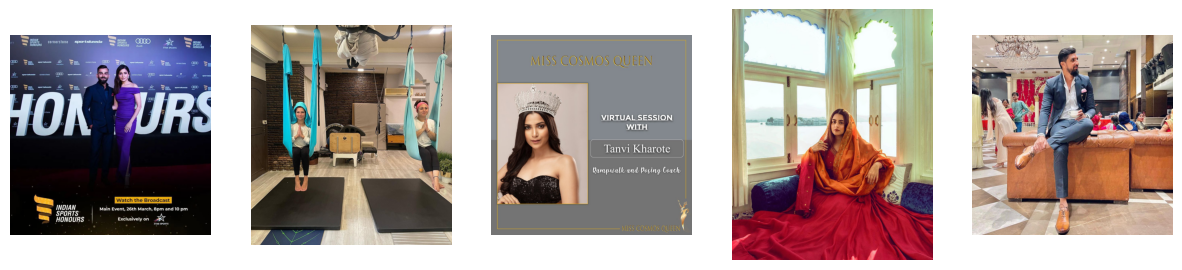

In [113]:
#function to show random 5 images from selectd topic
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

def show_images_from_topic(topic, num_images=5):
    # Filter the DataFrame to get rows with the selected topic
    topic_df = df[df['topic'] == topic]
    
    # Randomly select 'num_images' images
    selected_images = random.sample(topic_df['post_id'].tolist(), num_images)
    
    # Display the images
    print(f"Showing {num_images} random images from '{topic}':")
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, post_id in enumerate(selected_images):
        post_dir = os.path.join('Data', post_id)
        image_path = os.path.join(post_dir, topic_df[topic_df['post_id'] == post_id]['image1_name'].values[0])
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
       

    plt.show()

# Show 5 random images from each topic_0
show_images_from_topic('topic_6', num_images=5)

-------------------------
#### Mapping Topic Name to each image in the dataset

In [91]:
topic_map = {
    'topic_0': 'Photography and Eyewear',
    'topic_1': 'Sports and Athletics',
    'topic_2': 'Facial Features and Branding in Graphic Design',
    'topic_3': 'Automotive and Vehicles',
    'topic_4': 'Food and Cuisine',
    'topic_5': 'Nature and Outdoors',
    'topic_6': 'Fashion and Clothing Design'
}

#add topic_name column
df['topic_name'] = df['topic'].map(topic_map)
df.head()

,post_id,image1_name,comments_count,caption,labels,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic,topic_name
0,anshukayoga_403394_2980015710008403800_3087_133,2022-11-26_12-26-17_UTC.jpg,133,A honour and privilege I will always be gratef...,"Product,Flooring,Smile,Fashion design,Beauty,E...",0.010234,0.010219,0.219281,0.010222,0.010204,0.010213,0.729626,topic_6,Fashion and Clothing Design
1,santoshishetty_746384_3016966416826776493_7112_30,2023-01-16_12-00-44_UTC_1.jpg,30,Was looking for some photos with @pryanca_t to...,"Glasses,Plant,Shoulder,Shorts,Vision care,Sung...",0.581531,0.011990,0.011921,0.011909,0.011907,0.176490,0.194252,topic_0,Photography and Eyewear
2,sachintendulkar_39433992_3033645984018219249_2...,2023-02-08_12-20-04_UTC_1.jpg,8790,Can you guess the city?\n\n#travel #travelgram\n,"Building,Sky,Water,Smile,Photograph,Skyscraper...",0.406263,0.012997,0.013001,0.012990,0.012992,0.528735,0.013023,topic_5,Nature and Outdoors
3,hbomax_3056324_3057101339109716519_20102_73,2023-03-12_21-01-40_UTC.jpg,73,By your side. \n\nThe season finale of #TheLas...,"Comfort,Flash photography,Fun,Darkness,Art,Sit...",0.194175,0.011912,0.011956,0.011920,0.011923,0.746132,0.011982,topic_5,Nature and Outdoors
4,ajinkyarahane_4701882_2982886863247728429_9568...,2022-11-30_11-30-45_UTC.jpg,133,Our experience with Reelabs has been extremely...,"Joint,Smile,Arm,Shoulder,Beard,Neck,Sleeve,Hap...",0.615869,0.011919,0.011943,0.011905,0.011905,0.011923,0.324536,topic_0,Photography and Eyewear


In [92]:
# df sort by comments_count
df_sorted = df.sort_values('comments_count', ascending=False)

#quartiles of comments_count
quartiles = df_sorted['comments_count'].quantile([0.25, 0.5, 0.75])
print(quartiles)

0.25     30.75
0.50    102.50
0.75    446.75
Name: comments_count, dtype: float64


-------------------------
# Comparison of the average topic weights of images across top and bottom quartiles 

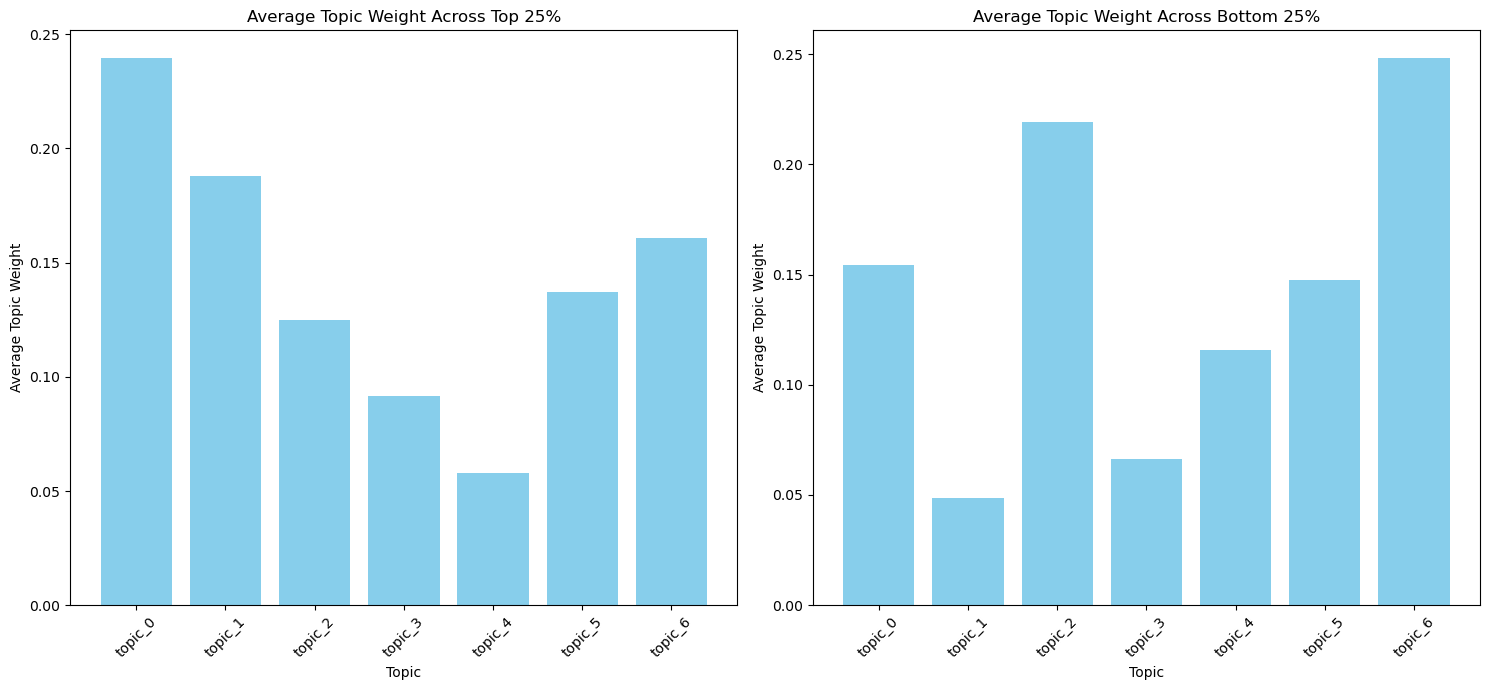

In [93]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 3 columns
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(15, 7))



# Plot average of topic_0 to topic_6 for top 25% comments_count
df_top_25 = df_sorted[df_sorted['comments_count'] >= quartiles[0.75]]
topic_avg_top_25 = df_top_25[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].mean()
ax2.bar(topic_avg_top_25.index, topic_avg_top_25.values, color='skyblue')
ax2.set_xlabel('Topic')
ax2.set_ylabel('Average Topic Weight')
ax2.set_title('Average Topic Weight Across Top 25%')
ax2.tick_params(axis='x', rotation=45)

# Plot average of topic_0 to topic_6 for bottom 25% comments_count
df_bottom_25 = df_sorted[df_sorted['comments_count'] <= quartiles[0.25]]
topic_avg_bottom_25 = df_bottom_25[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].mean()
ax3.bar(topic_avg_bottom_25.index, topic_avg_bottom_25.values, color='skyblue')
ax3.set_xlabel('Topic')
ax3.set_ylabel('Average Topic Weight')
ax3.set_title('Average Topic Weight Across Bottom 25%')
ax3.tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [94]:
#dataframe with top 25% average topic weights and bottom 25% average topic weights
topic_avg_top_25 = topic_avg_top_25.reset_index()
topic_avg_top_25.columns = ['topic', 'top_25_avg_weight']

topic_avg_bottom_25 = topic_avg_bottom_25.reset_index()
topic_avg_bottom_25.columns = ['topic', 'bottom_25_avg_weight']

topic_avg_df = pd.merge(topic_avg_top_25, topic_avg_bottom_25, on='topic')

topic_avg_df



,topic,top_25_avg_weight,bottom_25_avg_weight
0,topic_0,0.239757,0.154532
1,topic_1,0.188057,0.048441
2,topic_2,0.124773,0.219010
3,topic_3,0.091510,0.066452
4,topic_4,0.058066,0.115631
5,topic_5,0.137102,0.147576
6,topic_6,0.160734,0.248358


-------------------------
#### Topic comparison of the top 25% and bottom 25% of posts based on the number of comments

| Percentile | Topic | Topic Name | Weight |
|------------|-------|-------------|--------|
| Top 25% | topic_0 | Photography and Eyewear | 0.24 |
| Top 25% | topic_1 | Sports and Athletics | 0.19 |
| Bottom 25% | topic_6 | Fashion and Clothing Design | 0.25 |
| Bottom 25% | topic_2 | Facial Features and Branding in Graphic Designs | 0.22 |


-------------------------
# Task B : Recommenation

### Recommendations to Increase Instagram Engagement

Based on the topic modeling analysis comparing the top 25% and bottom 25% of Instagram posts by number of comments, here are some recommendations to help increase engagement on their Instagram page:

1. **Focus on Photography and Eyewear Content**
- The analysis shows that the top engaging posts had a higher weight (0.24) for the "Photography and Eyewear" topic compared to the bottom posts.
- I will suggest client to showcase high-quality, artistic photos featuring sunglasses, glasses frames, models wearing eyewear, etc.
- Use appealing visuals to grab attention.

2. **Incorporate Sports and Athletics Themed Imagery**
- The top posts also had a notable weight (0.19) for the "Sports and Athletics" topic.
- Client should tie Feature athletes, action shots, fitness inspiration, or eyewear products to an active, sporty lifestyle.
- This could resonate well with client's audience.

3. **Be Selective with Fashion and Clothing Design Content**
- The bottom 25% of posts had the highest weight (0.25) in the "Fashion and Clothing Design" topic.
- Client should Ensure the fashion content is unique and compelling as this is not engaging as much as other topics.

4. **Avoid Overusing Facial Closeups and Heavy Graphic Design**
- Low engaging posts had significant weight (0.22) in the "Facial Features and Branding in Graphic Designs" topic.
- Using some facial closeups is fine, but client should not overdo it.
- Client should be be judicious about heavy text/graphic overlays that can distract from the core visual appeal.

### Additional Recommendations:
1. **Experiment and Analyze Your Own Results**
- While this analysis provides directional guidance, every brand's audience is unique.
- Client should test out more eyewear photography, sports imagery, and dialed back fashion/graphic design posts.
- Using Instagram analytics to see which specific posts get the best engagement within these broad topics.

2. **Look at Other Engagement Tactics**
- Engage with audience through comments, questions, stories, and hashtags.
- Host contests and feature user-generated content to encourage more comments and participation.

By leaning into the content themes that resonate most with their highly engaged posts, and pulling back on the less engaging topics, client can optimize their Instagram content strategy to drive more comments and overall interaction with their brand.